# Result analysis of GAD

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, precision_recall_fscore_support

In [18]:
data_file_path = "../datasets/GAD/final_test.txt"
filepath="../datasets/GAD/final_data/test.tsv"

gad_labels = ["Gene-Disease", "No Gene-Disease"]

plot_labels = gad_labels

In [19]:
# Load the results data file
data = pd.read_csv(data_file_path, header=None)
results_df = pd.concat([data.iloc[0], data.iloc[1]], axis=1)

# Loading test data file
data_df = pd.read_csv(filepath, header=None, delimiter='\t', names=['sentence', 'label'])


In [20]:
results_df.columns = ["y_pred","y_true"]
results_df

,y_pred,y_true
0,0,0
1,1,0
2,0,0
3,0,1
4,1,1
...,...,...
528,1,1
529,0,1
530,1,1
531,1,1


In [21]:
results_df['y_true'].unique()

array([0, 1])

In [22]:
idx=10
print(data_df.iloc[idx]['sentence'], data_df.iloc[idx]['label'])

Therefore, @GENE$ and RNASEL may play a role in @DISEASE$ progression and severity. 1


### Result analysis

In [23]:
# Create a confusion matrix and other metrics
y_true = results_df["y_true"]
y_preds = results_df["y_pred"]

f1 = f1_score(y_true, y_preds, average='micro')
macro_vals = precision_recall_fscore_support(y_true, y_preds, average='macro')
micro_vals = precision_recall_fscore_support(y_true, y_preds, average='micro')
weighted_vals = precision_recall_fscore_support(y_true, y_preds, average='weighted')
class_vals = precision_recall_fscore_support(y_true, y_preds, average=None)

print("Micro F1: ", micro_vals)
cm = confusion_matrix(y_true, y_preds, normalize='true')

Micro F1:  (0.797373358348968, 0.797373358348968, 0.797373358348968, None)


In [24]:
print(classification_report(y_true, y_preds, target_names=plot_labels))

                 precision    recall  f1-score   support

   Gene-Disease       0.76      0.80      0.78       239
No Gene-Disease       0.83      0.79      0.81       294

       accuracy                           0.80       533
      macro avg       0.80      0.80      0.80       533
   weighted avg       0.80      0.80      0.80       533



In [26]:
# Calculate ratios
cm_df = pd.DataFrame(cm)
df_ratios = cm_df.div(cm_df.sum(axis=1), axis=0).round(4) *100

# df_norm_col
df_ratios 

,0,1
0,80.33,19.67
1,20.75,79.25


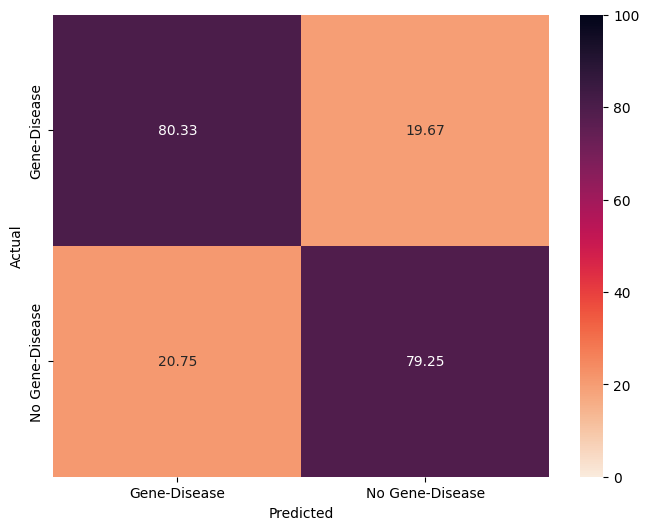

In [30]:
# Create a heatmap of the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df_ratios, annot=True,fmt=".2f", cmap='rocket_r',vmin=0, vmax=100, xticklabels=plot_labels, yticklabels=plot_labels )

plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix for Sentence Distance: 0')
# plt.savefig("cutoff1_conf_mat.pdf",bbox_inches="tight")
# plt.xticklabels(adjusted_n2c2_labels)
plt.xticks(rotation=0)
plt.yticks(rotation=90)
plt.savefig("./gad_cm.pdf",bbox_inches='tight')
plt.show()

In [16]:
# # Get unique labels and their respective counts for true and predicted labels
# unique_true_labels, true_label_counts = combined_data_df['y_true'].value_counts().sort_index().index, combined_data_df['y_true'].value_counts().sort_index().values
# unique_predicted_labels, predicted_label_counts = combined_data_df['y_pred'].value_counts().sort_index().index, combined_data_df['y_pred'].value_counts().sort_index().values

# print(unique_true_labels)
# print(unique_predicted_labels)
# bar_width = 0.5 

# # Set position of bar on X axis
# br1 = np.arange(len(unique_true_labels))
# br2 = [x + bar_width for x in br1]

# # Make the plot
# plt.bar(br1, true_label_counts, color ='r', width = bar_width,
#         edgecolor ='grey', label ='IT')
# plt.bar(br2, predicted_label_counts, color ='g', width = bar_width,
#         edgecolor ='grey', label ='ECE')

# # Add labels and title
# plt.xlabel('Class Label')
# plt.ylabel('Count')
# plt.title('Class Importance Plot')
# plt.legend()

# # Show the plot
# plt.show()

In [17]:
# true_grouped = df.groupby('true_labels').size()
# predicted_grouped = df.groupby('predicted_labels').size()

# predicted_grouped.plot(kind='bar', stacked=True, rot=0)
# plt.xlabel('Model 1 Predictions')
# plt.ylabel('Count')
# plt.title('Grouped Bar Chart of Wrongly Classified Datapoints')
# plt.legend(title='Model 2 Predictions', loc='upper right')
# plt.show()

<AxesSubplot:>

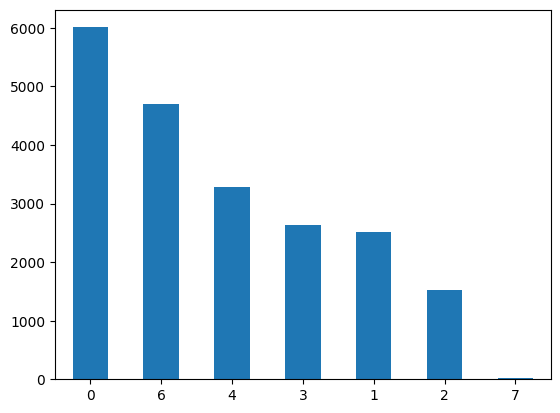

In [21]:
results_df['y_pred'].value_counts().plot(kind='bar', rot=0)

In [33]:
data = {
    'true_labels': results_df['y_true'].values.tolist(),
    'predicted_labels': results_df['y_pred'].values.tolist()
}
df = pd.DataFrame(data)
true = df.groupby('true_labels').size().tolist()
preds = df.groupby('predicted_labels').size().tolist()
correct = df[df['true_labels'] == df['predicted_labels']].groupby('true_labels').size().tolist()
print(true)
print("Preds Before",preds)
preds.insert(5, 0)
print("Preds After",preds)
# print("Correct",correct)
print("Correct Before",correct)
correct.insert(5, 0)
print("Correct After",correct)

[239, 294]
Preds Before [253, 280]
Preds After [253, 280, 0]
Correct Before [192, 233]
Correct After [192, 233, 0]


In [34]:
# df[df['true_labels'] == df['predicted_labels']].groupby('true_labels').size()

In [35]:
print("Predictions:")
print(results_df['y_pred'].value_counts())
print("True labels:")
print(results_df['y_true'].value_counts())

Predictions:
1    280
0    253
Name: y_pred, dtype: int64
True labels:
1    294
0    239
Name: y_true, dtype: int64


### Class Importance Analysis

In [ ]:
x = np.arange(len(plot_labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(layout="constrained")
rects1 = ax.bar(x , true, width, label='True label distribution', color='lightseagreen')
rects2 = ax.bar(x + width, preds, width, label='Predicted label distribution')
rects3 = ax.bar(x + 2*width, correct, width, label='Correctly Predicted label distribution', color='lightcoral')

ax.set_xticklabels(plot_labels, fontsize="8")
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Class Importance Plot - True vs Predicted Labels',fontsize="10")
ax.set_xlabel('Relation Class',fontsize="10")
ax.set_ylabel('Count',fontsize="10",labelpad=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['left'].set_visible(False)

ax.set_xticks(x+width, plot_labels, fontsize="8", rotation=90)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.legend(fontsize="7")

ax.bar_label(rects1, padding=3, fontsize="8")
ax.bar_label(rects2, padding=3, fontsize="8")
ax.bar_label(rects3, padding=3, fontsize="8")

fig.tight_layout()

# plt.savefig("/Users/lathapevi/Documents/git_repos/thesis/src/visualisation/class_importance_plot_i2b2_2010.pdf")
plt.show()



### Error Analysis

In [41]:
data_df['sentence_len'] = data_df['sentence'].apply(len)
data_df.columns
# data_df = data_df.drop('senetence_len', axis=1)

Index(['sentence', 'label', 'sentence_len'], dtype='object')

In [42]:
wrongly_classified_df = results_df[results_df["y_pred"] != results_df["y_true"]]
correctly_classified_df = results_df[results_df["y_pred"] == results_df["y_true"]]
print("Wrongly classified {}".format(len(wrongly_classified_df)))
print("Correctly classified {}".format(len(correctly_classified_df)))
print("Total {}".format(len(results_df)))

Wrongly classified 8321
Correctly classified 12370
Total 20691


In [43]:
wrongly_classified_df.head(5)

,y_pred,y_true
0,6,7
1,4,0
3,4,0
4,6,1
10,6,4


In [37]:
combined_data_df = pd.concat([data_df, results_df], axis=1)

In [38]:
combined_data_df.columns

Index(['sentence', 'label', 'y_pred', 'y_true'], dtype='object')

In [39]:
combined_data_df.to_csv("/Users/lathapevi/Documents/git_repos/thesis/datasets/GAD/results_combined_data.csv", index=False)

In [46]:
# Calculate the total number of wrong predictions
total_wrong_predictions = len(wrongly_classified_df)

# Define bins for text length
bin_edges = [0, 50, 100, 150, 200, 250, 300, float('inf')]
bin_labels = ['<= 50', '51-100', '101-150', '151-200', '201-250', '251-300', '> 300']

# Create a new column 'text_length_bin' to represent the bins
combined_data_df['sentence_len_bin'] = pd.cut(combined_data_df['sentence_len'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate the total number of wrong predictions
# total_wrong_predictions = combined_data_df[combined_data_df['y_true'] != combined_data_df['y_pred']].shape[0]

# Group by text length bins and calculate the proportion of wrong predictions for each group
proportion_wrong_predictions = (
    combined_data_df[combined_data_df['y_true'] != combined_data_df['y_pred']]
    .groupby('sentence_len_bin')
    .size()
    .div(total_wrong_predictions)
    .reset_index(name='proportion_wrong')
)



/opt/anaconda3/envs/thesis02/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


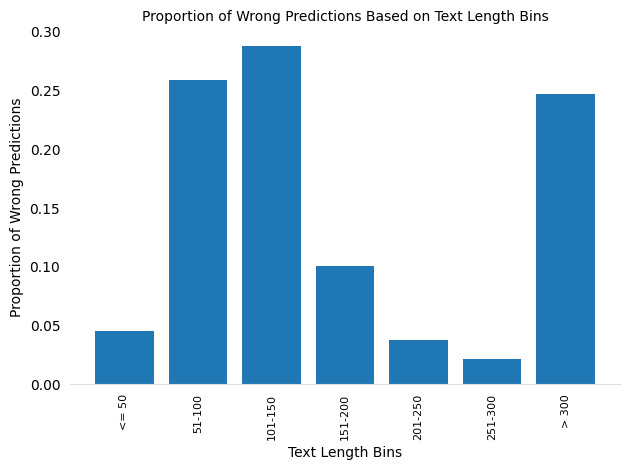

In [47]:
fig, ax = plt.subplots()

ax.bar(proportion_wrong_predictions['sentence_len_bin'], proportion_wrong_predictions['proportion_wrong'])

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Proportion of Wrong Predictions Based on Text Length Bins',fontsize="10")
ax.set_xlabel('Text Length Bins',fontsize="10")
ax.set_ylabel('Proportion of Wrong Predictions',fontsize="10")
ax.set_xticklabels(bin_labels, fontsize="8", rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['left'].set_visible(False)

# ax.set_xticks(x,bin_labels)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(False)
# ax.yaxis.grid(True, color='#EEEEEE')
# ax.xaxis.grid(False)

fig.tight_layout()

# plt.xticks(labels=plot_labels, fontsize="8")
plt.savefig("/Users/lathapevi/Documents/git_repos/thesis/src/visualisation/text_length_v_s_wrong_preds_i2b2_2010.pdf")
plt.show()

In [48]:
grouped_data = data_df.groupby(['sentence_len', 'label']).size().unstack(fill_value=0)

/opt/anaconda3/envs/thesis02/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


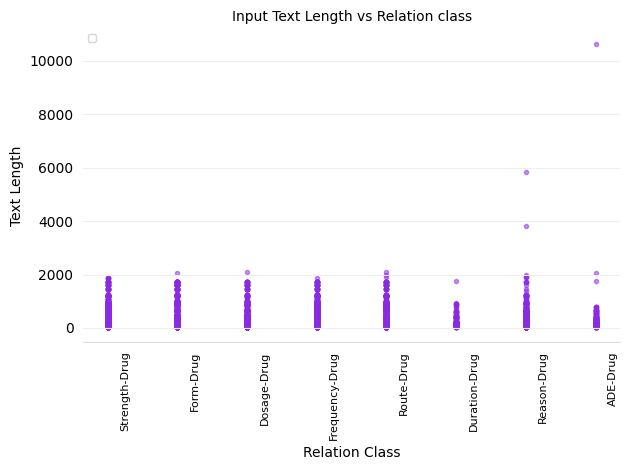

In [50]:
# ANALYSIS THE CLASS LABELS with that of INPUT_LENGTH

fig, ax = plt.subplots()

ax.scatter(data_df['label'], data_df['sentence_len'], marker=".", alpha=0.5, c="blueviolet")

ax.set_xticklabels(plot_labels, fontsize="8", rotation=90)
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Input Text Length vs Relation class',fontsize="10")
ax.set_xlabel('Relation Class',fontsize="10")
ax.set_ylabel('Text Length',fontsize="10")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['left'].set_visible(False)

ax.legend(fontsize="7", loc ="upper left")
ax.set_xticks(x+width, plot_labels)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(False)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

fig.tight_layout()

# plt.xticks(labels=plot_labels, fontsize="8")
plt.savefig("/Users/lathapevi/Documents/git_repos/thesis/src/visualisation/class_label_vs_input_length_i2b2_2010.pdf")
plt.show()

In [65]:
# combined_data_df.drop(['rel'], axis=1, inplace=True)

In [68]:
combined_data_df['pred_rel'] = combined_data_df['y_pred'].map(id2label)
combined_data_df['true_rel'] = combined_data_df['y_true'].map(id2label)
combined_data_df.head(5)

,sentence,label,sentence_len,y_pred,y_true,sentence_len_bin,pred_rel,true_rel
0,"ALLERGIES : @Penicillin$ , which produces a @r...",7,52,6,7,51-100,Reason-Drug,ADE-Drug
1,@Toprol$ @100$ .,0,16,4,0,<= 50,Route-Drug,Strength-Drug
2,@Lipitor$ @10$ q.d. 3 .,0,23,0,0,<= 50,Strength-Drug,Strength-Drug
3,@Cardura$ @2$ q.d. SOCIAL HISTORY : Significan...,0,97,4,0,51-100,Route-Drug,Strength-Drug
4,Chronic obstructive pulmonary disease exacerba...,1,582,6,1,> 300,Reason-Drug,Form-Drug


In [69]:
problematic_datapoints = combined_data_df[combined_data_df['y_true'] != combined_data_df['y_pred']]
problematic_datapoints.head(5)

,sentence,label,sentence_len,y_pred,y_true,sentence_len_bin,pred_rel,true_rel
0,"ALLERGIES : @Penicillin$ , which produces a @r...",7,52,6,7,51-100,Reason-Drug,ADE-Drug
1,@Toprol$ @100$ .,0,16,4,0,<= 50,Route-Drug,Strength-Drug
3,@Cardura$ @2$ q.d. SOCIAL HISTORY : Significan...,0,97,4,0,51-100,Route-Drug,Strength-Drug
4,Chronic obstructive pulmonary disease exacerba...,1,582,6,1,> 300,Reason-Drug,Form-Drug
10,The patient was placed on @Diltiazem$ @drip$ a...,4,135,6,4,101-150,Reason-Drug,Route-Drug


In [53]:
problematic_datapoints.to_csv("/Users/lathapevi/Documents/git_repos/thesis/datasets/i2b2_2010/problematic_datapoints.csv", index=False)

In [70]:
correct_datapoints = combined_data_df[combined_data_df['y_true'] == combined_data_df['y_pred']]
correct_datapoints.head(5)

,sentence,label,sentence_len,y_pred,y_true,sentence_len_bin,pred_rel,true_rel
2,@Lipitor$ @10$ q.d. 3 .,0,23,0,0,<= 50,Strength-Drug,Strength-Drug
5,Chronic obstructive pulmonary disease exacerba...,6,582,6,6,> 300,Reason-Drug,Reason-Drug
6,Chronic obstructive pulmonary disease exacerba...,6,582,6,6,> 300,Reason-Drug,Reason-Drug
7,Chronic obstructive pulmonary disease exacerba...,6,582,6,6,> 300,Reason-Drug,Reason-Drug
8,Chronic obstructive pulmonary disease exacerba...,6,582,6,6,> 300,Reason-Drug,Reason-Drug


In [71]:
problematic_datapoints.iloc[0]['sentence']

'ALLERGIES : @Penicillin$ , which produces a @rash$ .'

In [73]:
# problematic_datapoints_TrWP = problematic_datapoints[problematic_datapoints['rel'] == 'TrWP']

In [74]:
# problematic_datapoints_TrWP.head(10)

In [75]:
# problematic_datapoints_TrWP.iloc[7]['sentence']